In [4]:
from torch.utils.data import Dataset, dataloader
import pandas 
from torchvision import transforms
import os

In [5]:
#training dataset
!wget --quiet -O /resources/data/training_data_pytorch.tar.gz https://cocl.us/DL0320EN_TRAIN_TAR_PYTORCH
!tar -xzf  /resources/data/training_data_pytorch.tar.gz -C /resources/data --exclude '.*'

#validation dataset
!wget --quiet -O /resources/data/validation_data_pytorch.tar.gz https://cocl.us/DL0320EN_VALID_TAR_PYTORCH
!tar -xzf  /resources/data/validation_data_pytorch.tar.gz -C /resources/data --exclude '.*'

'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open '/resources/data/training_data_pytorch.tar.gz'
'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open '/resources/data/validation_data_pytorch.tar.gz'


In [6]:
# from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [7]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [8]:
# Loading training dataset

train_csv_file = 'https://cocl.us/DL0320EN_TRAIN_CSV'

In [9]:

train_data_name = pd.read_csv(train_csv_file)
train_data_name.head()

,Unnamed: 0,denomination,filename,y
0,0,5,0.jpeg,0
1,1,5,1.jpeg,0
2,2,5,2.jpeg,0
3,3,5,3.jpeg,0
4,4,5,4.jpeg,0


In [10]:
print('File name:',train_data_name.iloc[0,2])

File name: 0.jpeg


In [11]:
print('y:', train_data_name.iloc[0,3])

y: 0


In [12]:
print('file name:',train_data_name.iloc[1,2])
print('y:',train_data_name.iloc[1,3])

file name: 1.jpeg
y: 0


In [13]:
print('The number of rows:',train_data_name.shape[0])

The number of rows: 70


In [14]:
#Loading validation dataset
validation_csv_file = 'https://cocl.us/DL0320EN_VALID_CSV'

In [15]:
validation_data_name = pd.read_csv(validation_csv_file)
validation_data_name.head()

,Unnamed: 0,denomination,filename,y
0,0,5,0.jpeg,0
1,1,5,1.jpeg,0
2,2,5,2.jpeg,0
3,3,5,3.jpeg,0
4,4,5,4.jpeg,0


In [16]:
print('file_name', validation_data_name.iloc[10,2])
print('y',validation_data_name.iloc[10,3])

file_name 10.jpeg
y 1


In [17]:
#Load Images
#training Images

train_data_dir = 'data/training_data_pytorch/'

In [18]:
train_data_name.iloc[1,2]

'1.jpeg'

In [19]:
#combine the folder name with file name
train_image_name = train_data_dir + train_data_name.iloc[1,2]

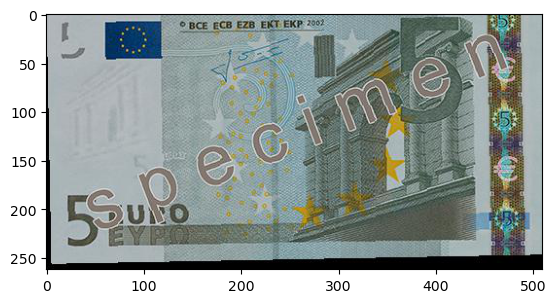

In [20]:
#plot the second training image
image = Image.open(train_image_name)
plt.imshow(image)
plt.show()

In [21]:
train_image_name = train_data_dir + train_data_name.iloc[19,2]

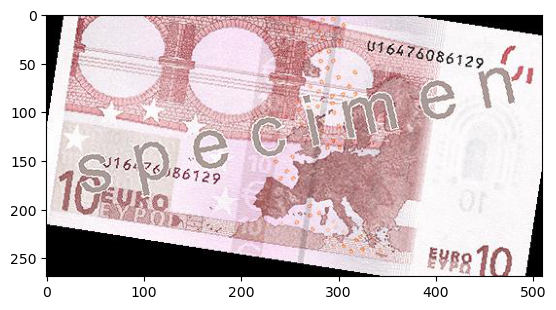

In [23]:
image = Image.open(train_image_name)
plt.imshow(image)
plt.show()

In [32]:
validation_data_dir = 'data/validation_data_pytorch/'

In [33]:
validation_image_name = validation_data_dir + validation_data_name.iloc[1,2]

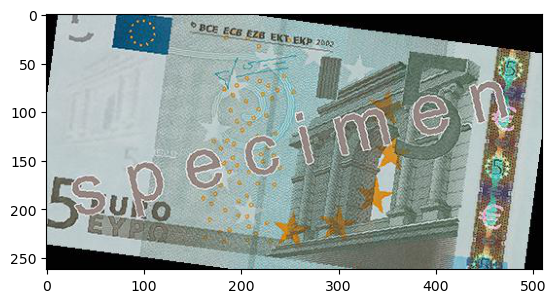

In [34]:
image = Image.open(validation_image_name)
plt.imshow(image)
plt.show()

In [36]:
#create dataset object

class Dataset(Dataset):
    def __init__(self,csv_file, data_dir, transform=None):
        #Image directory
        self.data_dir=data_dir
        self.transform = transform
        self.data_name = pd.read_csv(csv_file)
        self.len=self.data_name.shape[0]

def __len__(self):
    return self.len

def __getitem__(self,idx):
    img_name = self.data_dir + self.data_name.iloc[idx,2]

    image = Image.open(img_name)
    y = self.data_name.iloc[idx,3]

    if self.transform:
        image = self.transform(image)

    return image, y


In [92]:
#create the dataset objects

train_dataset = Dataset(csv_file=train_csv_file,
                        data_dir='data/training_data_pytorch/')
validation_dataset = Dataset(csv_file=validation_csv_file,
                             data_dir='data/validation_data_pytorch/')

In [155]:

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
composed = transforms.Compose([transforms.Resize((224, 224)),
                               transforms.ToTensor(), transforms.Normalize(mean, std)])

In [ ]:
test_normalization = Dataset(csv_file=train_csv_file,
                             data_dir='data/training_data_pytorch/',
                             transform=composed)